# Examples for `approx` submodule

Let's load the necessary modules.

In [14]:
from narcpack.approx import Cheb, LLS, Rational, RemezPoly, OrthoPoly
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Here we have the
- Chebyshev polynomial,
- linear least squares,
- rational function,
- Remez polynomial, and
- orthogonal polynomial

approximation methods.

We'll create a list of the classes we'll be testing as well as any optional arguments we want to use.

In [15]:
classes = [LLS,Cheb,Rational,RemezPoly,OrthoPoly]
optargs = [{},{'n':4},{},{'n':4},{'n':4}]
ls = ['-b','-r','-y','-k','-m']

We'll set up a simple function to handle our plotting.

In [16]:
def make_all_plots(g, interval=[-1,1]):
    fig, ax = plt.subplots(1,2,figsize=[12,4])
    x = np.linspace(interval[0],interval[1],1000)
    ax[0].plot(x,g(x),'--k',label='True')
    for n, f in enumerate(classes):
        a = f(g, interval, **optargs[n])
        ax[0].plot(x,a(x),ls[n],label=f.__name__)
        ax[1].plot(x,np.abs(a(x)-g(x)),ls[n])
    fig.legend()

First we'll try the absolute value function.

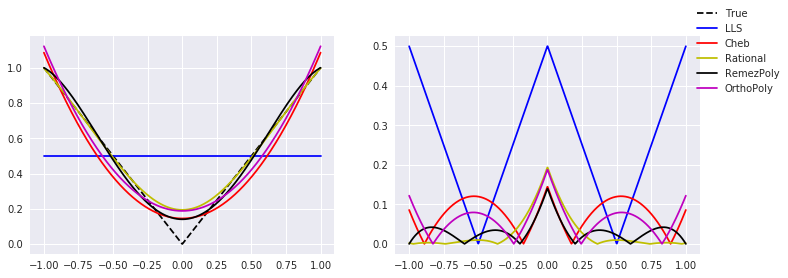

In [17]:
make_all_plots(lambda x : np.abs(x))

Now we'll try the sign function.

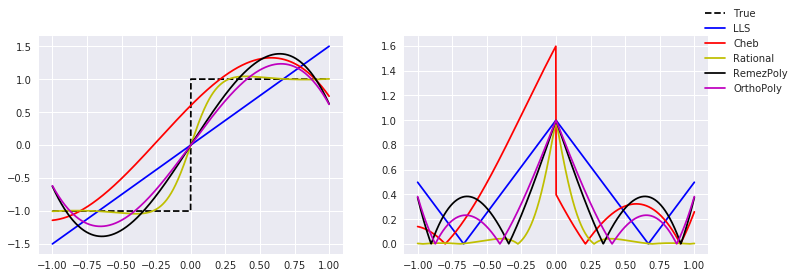

In [18]:
make_all_plots(lambda x : np.sign(x))

Now we'll try the Runge function and see if we observe Runge's phenomenon.

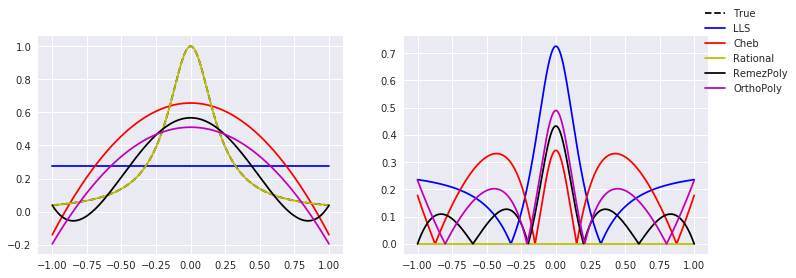

In [19]:
make_all_plots(lambda x : 1.0/(1.0+25.0*x**2))

Next is the exponential function.

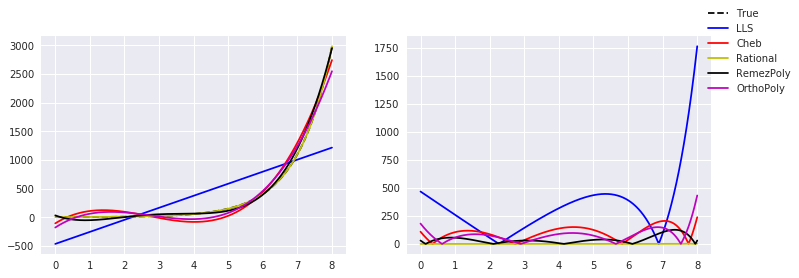

In [20]:
make_all_plots(lambda x : np.exp(x), [0,8])

Finally we'll try a function with an interval that approaches a singularity.

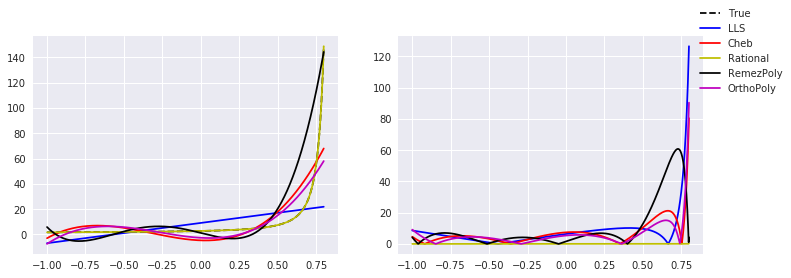

In [21]:
make_all_plots(lambda x : np.exp(1.0/(1.0-x)), [-1,0.8])

## More on the sign function
Let's turn our attention to the classes that use polynomial approximation: `Cheb`, `RemezPoly`, and `OrthoPoly`.

In [45]:
classes = [Cheb,RemezPoly,OrthoPoly]

In [50]:
def make_sign_plots(f):
    g = lambda x : np.sign(x)
    fig, ax = plt.subplots(1,2,figsize=[12,4])
    x = np.linspace(-1,1,1000)
    ax[0].plot(x,g(x),'--k',label='True')
    for n in range(5,10):
        a = f(g, [-1,1], n=n)
        ax[0].plot(x,a(x),label=str(n))
        ax[1].plot(x,np.abs(a(x)-g(x)))
    fig.suptitle(f.__name__)
    fig.legend()

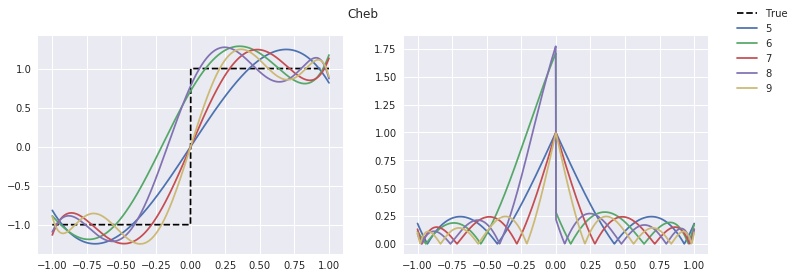

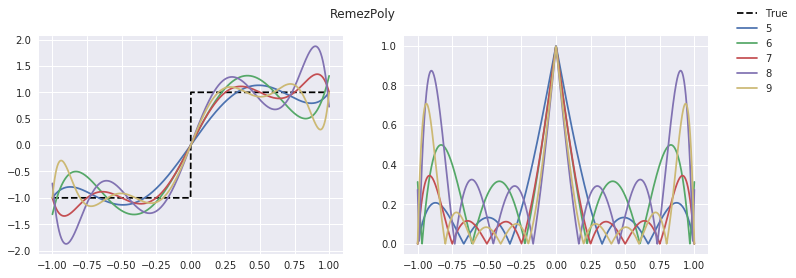

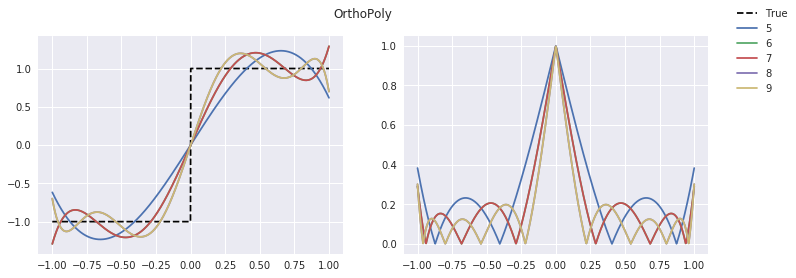

In [52]:
for f in classes:
    make_sign_plots(f)

## More on the Runge phenomenon

In [22]:
classes = [Cheb,RemezPoly,OrthoPoly]

In [54]:
def make_runge_plots(f):
    g = lambda x : 1.0/(1.0+25.0*x**2)
    fig, ax = plt.subplots(1,2,figsize=[12,4])
    x = np.linspace(-1,1,1000)
    ax[0].plot(x,g(x),'--k',label='True')
    for n in range(5,10):
        a = f(g, [-1,1], n=n)
        ax[0].plot(x,a(x),label=str(n))
        ax[1].plot(x,np.abs(a(x)-g(x)))
    fig.suptitle(f.__name__)
    fig.legend()

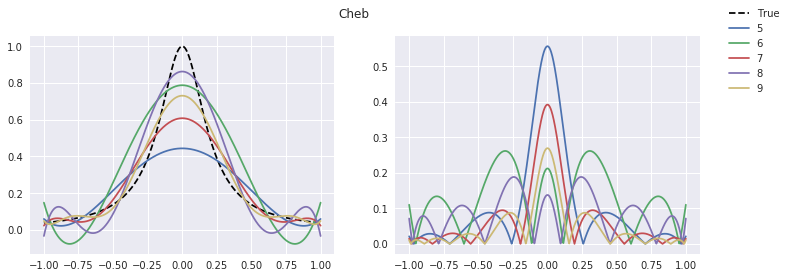

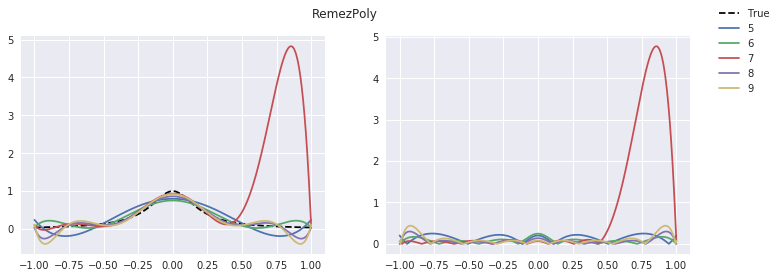

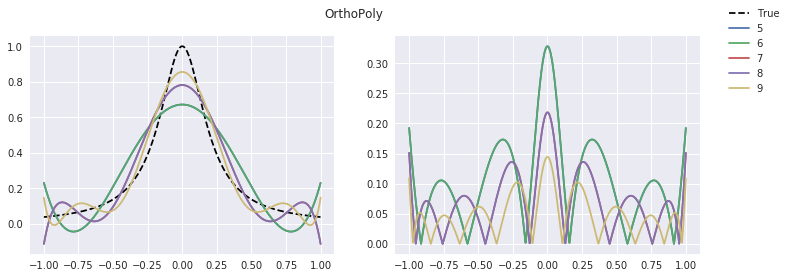

In [56]:
for f in classes:
    make_runge_plots(f)

## More on rational function approximation

This notebook was created to explore the effects of different parameter choices when approximating a function by rational functions. The main parameters to vary are the degrees of the polynomials in the numerator and denominator of the approximating function.

In [18]:
def max_rel_err(f,g):
    return np.max(np.abs((f-g) / g))

In [19]:
f = lambda x: np.exp(-x)
interval = [0,1]
max_deg = 5

xx = np.linspace(interval[0],interval[1])

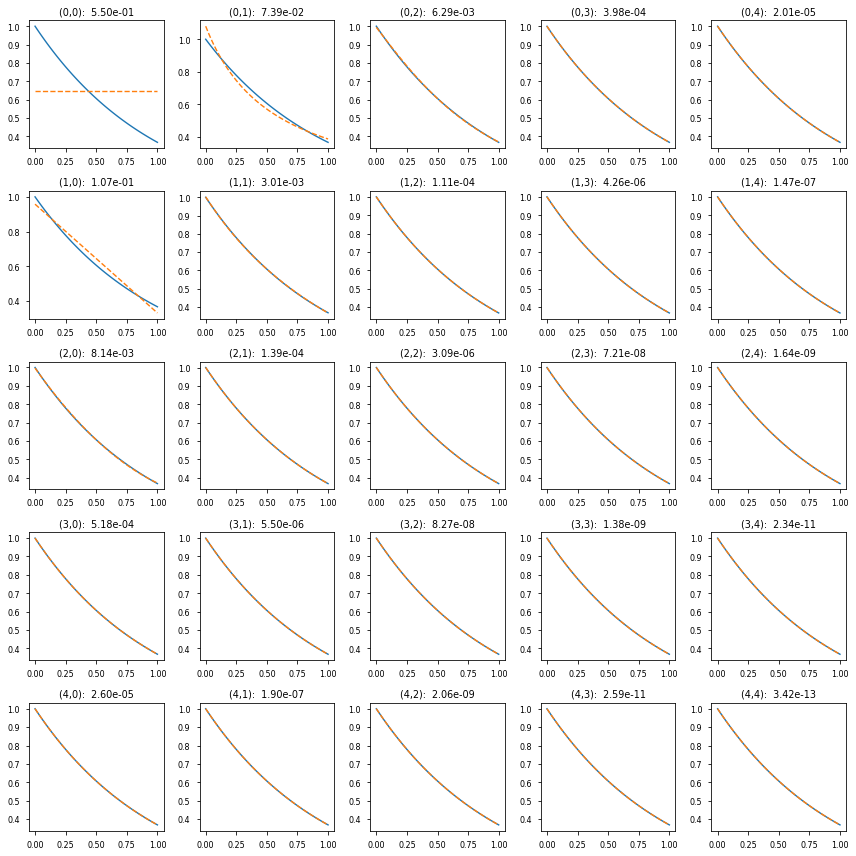

In [22]:
with plt.style.context(('seaborn-paper')):
    fig, axs = plt.subplots(max_deg, max_deg, figsize=(12,12))

    for nd in range(max_deg):
        for dd in range(max_deg):
            g = Rational(f, interval=interval, degs=[nd,dd])
            axs[nd,dd].plot(xx,f(xx),'-',xx,g(xx),'--')
            title_str = "({0},{1}):  {2:1.2e}".format(nd,dd,max_rel_err(f(xx),g(xx)))
            axs[nd,dd].set(title=title_str)


    plt.tight_layout()
    plt.show()